## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from plotnine import *

url = "https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1"
df = pd.read_csv(url)

X = df[["age","chol"]].values
y = (df["diagnosis"] == "Disease").astype(int).values
age55 = 55

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [3]:
logr = LogisticRegression().fit(X, y)
w1, w2 = logr.coef_[0]
c = logr.intercept_[0]
chol_50 = (0 - w1*age55 - c)/w2
chol_90 = (np.log(0.9/0.1) - w1*age55 - c)/w2
print("Logistic: chol at age 55 for p=0.5 =", chol_50)
print("Logistic: chol at age 55 for p=0.9 =", chol_90)

Logistic: chol at age 55 for p=0.5 = 367.8748897985851
Logistic: chol at age 55 for p=0.9 = -851.9660996782112


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [4]:
lda = LDA().fit(X, y)
w1_l, w2_l = lda.coef_[0]
c_l = lda.intercept_[0]
chol_lda = (0 - w1_l*age55 - c_l)/w2_l
print("LDA: chol at age 55 for boundary =", chol_lda)

LDA: chol at age 55 for boundary = 368.23535752993797


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [5]:
svc = GridSearchCV(SVC(kernel="linear"), {"C":[0.01,0.1,1,10,100]}, cv=5).fit(X, y)
best = svc.best_estimator_
w1_s, w2_s = best.coef_[0]
c_s = best.intercept_[0]
chol_svc = (0 - w1_s*age55 - c_s)/w2_s
print("SVC best C =", svc.best_params_["C"])
print("chol at age 55 =", chol_svc)

SVC best C = 0.1
chol at age 55 = 312.7019396029427


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

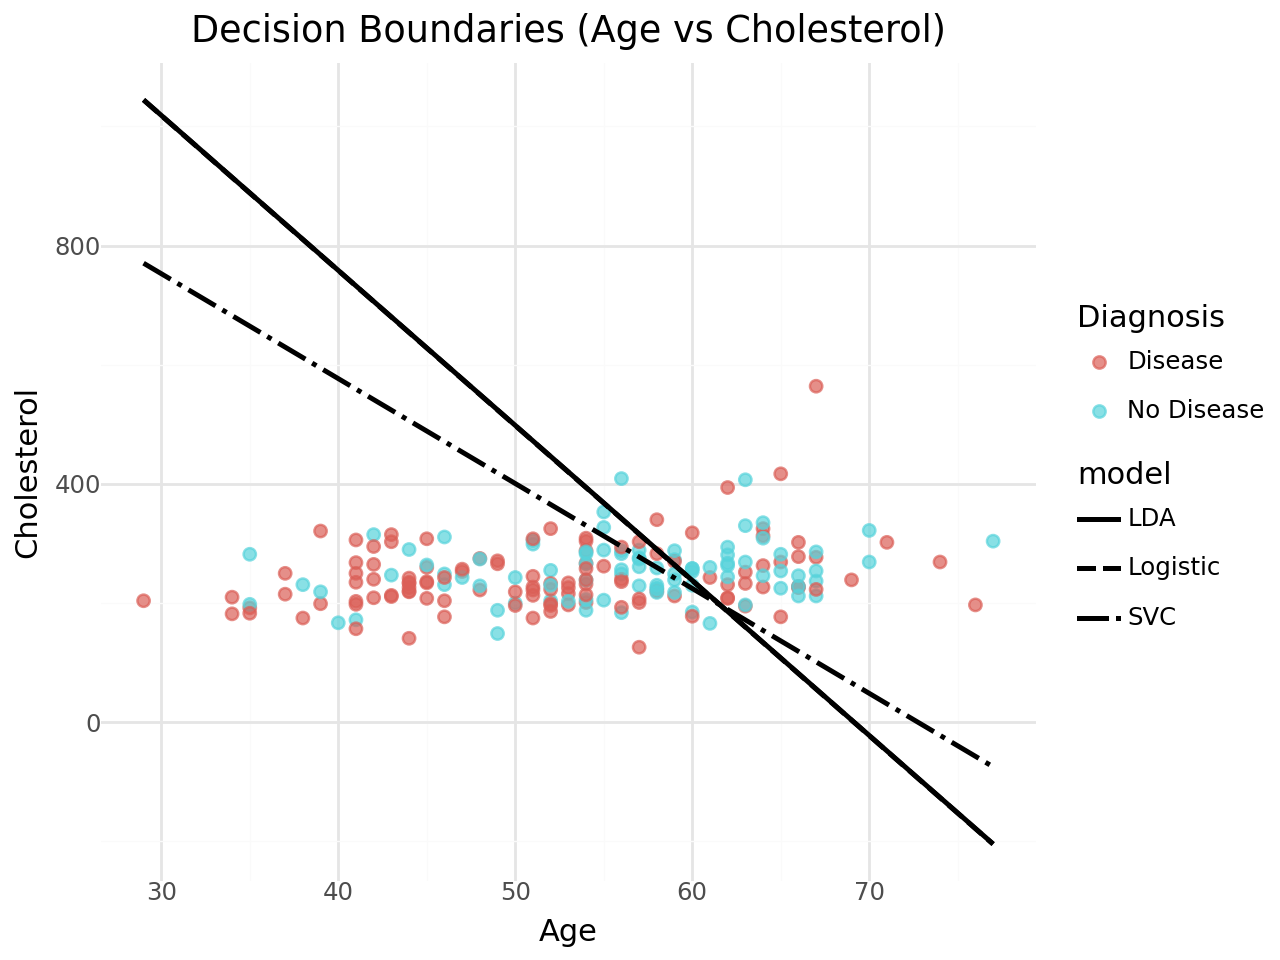

In [6]:
df["diagnosis"] = df["diagnosis"].astype(str).str.strip()

ages = np.linspace(df["age"].min(), df["age"].max(), 200)
lines = pd.DataFrame({
    "age": np.tile(ages, 3),
    "chol": np.concatenate([
        -(w1/w2)*ages - c/w2,
        -(w1_l/w2_l)*ages - c_l/w2_l,
        -(w1_s/w2_s)*ages - c_s/w2_s
    ]),
    "model": ["Logistic"]*200 + ["LDA"]*200 + ["SVC"]*200
})


plot = (
    ggplot(df, aes(x="age", y="chol")) +
    geom_point(aes(color="diagnosis"), size=2, alpha=0.7) +
    geom_line(data=lines, mapping=aes(x="age", y="chol", linetype="model"), size=1) +
    labs(
        title="Decision Boundaries (Age vs Cholesterol)",
        x="Age",
        y="Cholesterol",
        color="Diagnosis"
    ) +
    theme_minimal()
)

plot
